#### Importation de la bibliothèque pandas pour la manipulation et l'analyse des données

In [1]:
import pandas as pd
import numpy as np

#### Chargement des données séparées par un point-virgule depuis un fichier CSV

In [2]:
data = pd.read_csv('dataset_100_donnees.csv', delimiter=";")

#### Affichage d'un aperçu des 5 premières lignes du DataFrame pour s'assurer que les données sont correctement chargées

In [3]:
data.head()

,Taille (cm),Poids (kg),Admission
0,196,48,Refusé
1,191,41,Refusé
2,149,99,Refusé
3,184,64,Refusé
4,186,85,Admis


#### Extraction et sélection des données en fonction des colonnes **Taille** et **Poids** comme variables prédictives (X) et **Admission** comme variable cible (Y)


In [4]:
X = data[['Taille (cm)', 'Poids (kg)']]
Y = data['Admission']

#### Importation de la bibliothèque scikit-klearn

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import time

#### Séparation des données en un ensemble de données d'entraînement et de test (20% de données pour le test et 80% pour l'entrainement)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Affichage du graphique (nuage de points) de l'ensemble de données d'entrainement

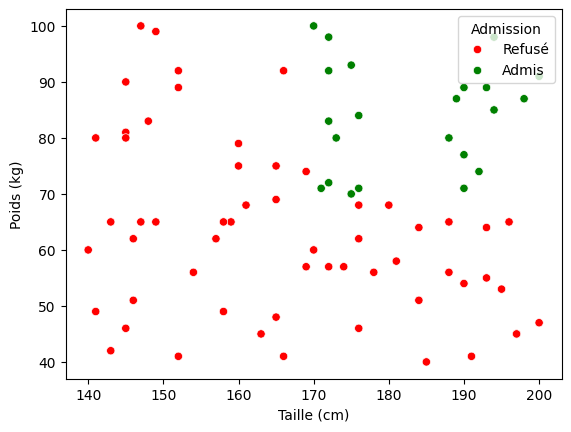

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

palette_color = {"Admis": "green", "Refusé": "red"}

sns.scatterplot(x=X_train["Taille (cm)"], y=X_train["Poids (kg)"], hue=Y_train, palette=palette_color)

plt.show()

#### Normalisation des données

In [8]:
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'scaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

#### Choix automatique du k optimal en considérant le taux d'erreur le plus faible

Le meilleur k est 1 avec un taux d'erreur de 0.0000


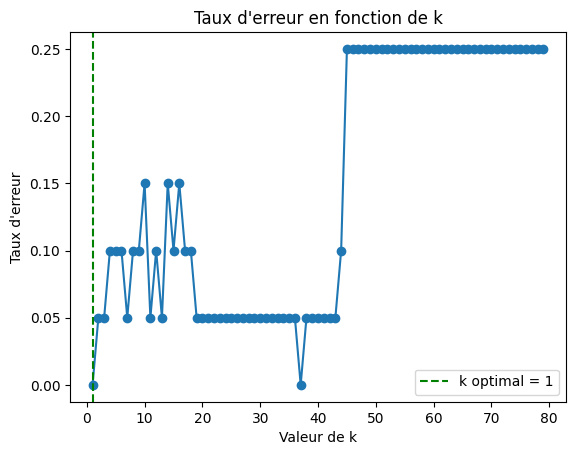

In [9]:
k_values = range(1, min(len(X_train), 500))
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(Y_test, Y_pred)
    error_rates.append(error_rate)

best_k = np.argmin(error_rates) + 1
best_error_rate = error_rates[best_k - 1]

print(f'Le meilleur k est {best_k} avec un taux d\'erreur de {best_error_rate:.4f}')

plt.plot(k_values, error_rates, marker='o')
plt.xlabel('Valeur de k')
plt.ylabel('Taux d\'erreur')
plt.title('Taux d\'erreur en fonction de k')

plt.axvline(x=best_k, color='green', linestyle='--', label=f'k optimal = {best_k}')
plt.legend()
plt.show()

#### Initialisation de classificateur KNN grâce au choix du k voisins plus proche et Entraînement du modèle à partir des données d'entraînement

In [10]:
start_time = time.time()
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Temps d'entraînement : {training_time} secondes")

Temps d'entraînement : 0.0030095577239990234 secondes


#### Prédiction des étiquettes pour les données de test

In [11]:
predictions = best_knn.predict(X_test)

print("Prédictions pour les données de test :")
for i, prediction in enumerate(predictions):
    print(f"Candidat {i+1} : {prediction}")

Prédictions pour les données de test :
Candidat 1 : Admis
Candidat 2 : Refusé
Candidat 3 : Refusé
Candidat 4 : Admis
Candidat 5 : Admis
Candidat 6 : Refusé
Candidat 7 : Refusé
Candidat 8 : Refusé
Candidat 9 : Refusé
Candidat 10 : Refusé
Candidat 11 : Refusé
Candidat 12 : Refusé
Candidat 13 : Refusé
Candidat 14 : Refusé
Candidat 15 : Refusé
Candidat 16 : Admis
Candidat 17 : Refusé
Candidat 18 : Refusé
Candidat 19 : Refusé
Candidat 20 : Admis


#### Matrice de confusion

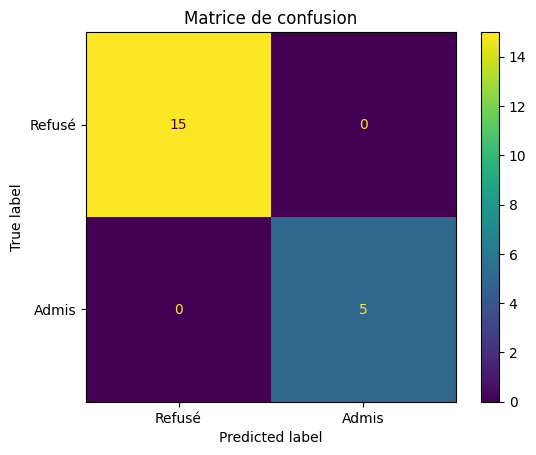

In [12]:
classes = list(set(Y_test.values))
cm = confusion_matrix(Y_test, predictions, labels=classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=classes)

cm_display.plot()
plt.title('Matrice de confusion')
plt.show()

#### Affichage du rapport de classification

In [13]:
print("Rapport de classification")
print(classification_report(Y_test, predictions))

test_data = pd.DataFrame(X_test, columns=['Taille (cm)', 'Poids (kg)'])
test_data['Admission'] = Y_test

print("Les données de test et leur étiquette sont :")
print(test_data)

Rapport de classification
              precision    recall  f1-score   support

       Admis       1.00      1.00      1.00         5
      Refusé       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Les données de test et leur étiquette sont :
    Taille (cm)  Poids (kg) Admission
83          186          83     Admis
53          151          84    Refusé
70          163          66    Refusé
45          176          81     Admis
44          195          91     Admis
39          141          97    Refusé
22          154          76    Refusé
80          169          91    Refusé
10          150         100    Refusé
0           196          48    Refusé
18          148          61    Refusé
30          144          43    Refusé
73          183          69    Refusé
33          187          42    Refusé
90          199          56    R

#### Nouvelle donnée du candidat à prédire

In [14]:
print("Entrez les données du nouveau candidat à prédire :\n\n")
new_data = {}
new_data_dup = {}

for i, column in enumerate(X.columns):
    value = float(input(f"Entrez la valeur de {column} : "))
    new_data[column] = [value]
    new_data_dup[column] = [value]
    
new_data["Admission"] = ["A prédire"]

Entrez les données du nouveau candidat à prédire :




Entrez la valeur de Taille (cm) :  160.7
Entrez la valeur de Poids (kg) :  80


#### Affichage du graphique (nuage de points) de l'ensemble de données d'entrainement et des nouvelles données X du candidat à prédire

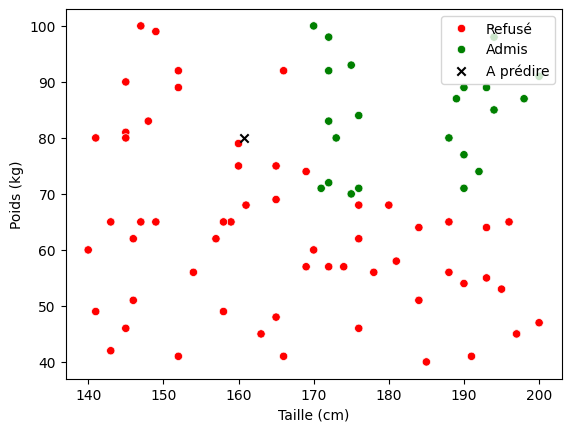

In [15]:
palette_color2 = {"Admis": "green", "Refusé": "red", "A prédire": "black"}

sns.scatterplot(x=X_train["Taille (cm)"], y=X_train["Poids (kg)"], hue=Y_train, palette=palette_color2)
plt.scatter(new_data["Taille (cm)"], new_data["Poids (kg)"], color=palette_color2["A prédire"], marker="x", label="A prédire")
plt.legend()
plt.show()


#### Création d'un DataFrame à partir des nouvelles données pour la prédiction

In [16]:
new_df = pd.DataFrame(new_data_dup)

#### Prédiction pour les nouvelles données

In [17]:
# formater l'affichage des données taille et poids
new_data_taille, new_data_poids = str(new_data_dup['Taille (cm)'][0]), str(new_data_dup['Poids (kg)'][0])
index_dot_taille, index_dot_poids = new_data_taille.index('.'), new_data_poids.index('.')

new_data_taille = int(float(new_data_taille)) if new_data_taille[index_dot_taille+1:][0] == '0' else float(new_data_taille)
new_data_poids = int(float(new_data_poids)) if new_data_poids[index_dot_poids+1:][0] == '0' else float(new_data_poids)

# fonction permettant de mettre une couleur de texte à la prédiction (vert pour Admis et rouge pour Refusé
def colorise(text):
    green = '\033[92m' # vert
    red = '\033[91m' # rouge
    
    if text == 'Admis':
        return green + text
    elif text == 'Refusé':
        return red + text
        
new_prediction = best_knn.predict(new_df)

print(f"Données nouveau candidat: \nTaille: {new_data_taille} cm \nPoids: {new_data_poids} kg")
print(f"La prédiction pour les nouvelles données du nouveau candidat est : {colorise(new_prediction[0])}")

Données nouveau candidat: 
Taille: 160.7 cm 
Poids: 80 kg
La prédiction pour les nouvelles données du nouveau candidat est : Refusé
